# Web Page Phishing Classification

Web Page Phishing Dataset
#####This dataset is the result of merging two datasets with identical features. However, not all features from the original datasets have been retained in the merged dataset. This selective feature inclusion was done to focus on the most relevant data and to avoid redundancy. The resulting dataset provides a comprehensive view of the shared characteristics between the two original datasets, while maintaining a streamlined and focused set of features.

###[Dataset taken from Kaggle](https://www.kaggle.com/datasets/danielfernandon/web-page-phishing-dataset/data)


*   url_length: The length of the URL
*   n_dots: The count of ‘.’ characters in the URL.
*   n_hypens: The count of ‘-’ characters in the URL.
*   n_underline: The count of ‘_’ characters in the URL.
*   n_slash: The count of ‘/’ characters in the URL.
*   n_dots: The count of ‘.’ characters in the URL.
*   n_questionmark: The count of ‘?’ characters in the URL.
*   n_equal: The count of ‘=’ characters in the URL.
*   n_at: The count of ‘@’ characters in the URL.
*   n_and: The count of ‘&’ characters in the URL.
*   n_exclamation: The count of ‘!’ characters in the URL.
*   n_space: The count of ’ ’ characters in the URL
*   n_tilde: The count of ‘~’ characters in the URL
*   n_comma: The count of ‘,’ characters in the URL.
*   n_plus: The count of ‘+’ characters in the URL
*   n_asterisk: The count of ‘*’ characters in the URL.
*   n_hastag: The count of ‘#’ characters in the URL.
*   n_dollar: The count of ‘$’ characters in the URL.
*   n_percent: The count of ‘%’ characters in the URL.
*  n_redirection: The count of redirections in the URL.
*   phishing: The Labels of the URL. 1 is phishing and 0 is legitimate.






## Importing required libraries
### **Numpy**
##### Using for array computation.
```
import numpy as np
```
### **Pandas**
##### using for importing dataset and perform operations.
```
import pandas as pd
```
### **Seaborn and Matplotlib**
##### For Data Visualization.
```
import seaborn as sns
import matplotlib.pyplot as plt
```
### **Scikit-learn**
##### For model selection, preprocessing methods, constructing instances of Machine Learning models.
```
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
```


In [99]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

## Importing Dataset and Visualization [EDA]

#### Exploratory Data Analysis


*   Checking null/missing values
*   Number of Categories
*   Duplicates
*   Correlation Matrix
*   Checking if dataset is balanced or not?






In [100]:
dataset = pd.read_csv('/content/web-page-phishing.csv')
dataset.head()

,url_length,n_dots,n_hypens,n_underline,n_slash,n_questionmark,n_equal,n_at,n_and,n_exclamation,n_space,n_tilde,n_comma,n_plus,n_asterisk,n_hastag,n_dollar,n_percent,n_redirection,phishing
0,37,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,77,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,126,4,1,2,0,1,3,0,2,0,0,0,0,0,0,0,0,0,1,1
3,18,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,55,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [101]:
print("Any Null or missing values :",dataset.isnull().sum().sum())
print("Total number of Categories :",dataset['phishing'].unique())
print("Duplicates :",dataset.duplicated().sum())

Any Null or missing values : 0
Total number of Categories : [0 1]
Duplicates : 78186


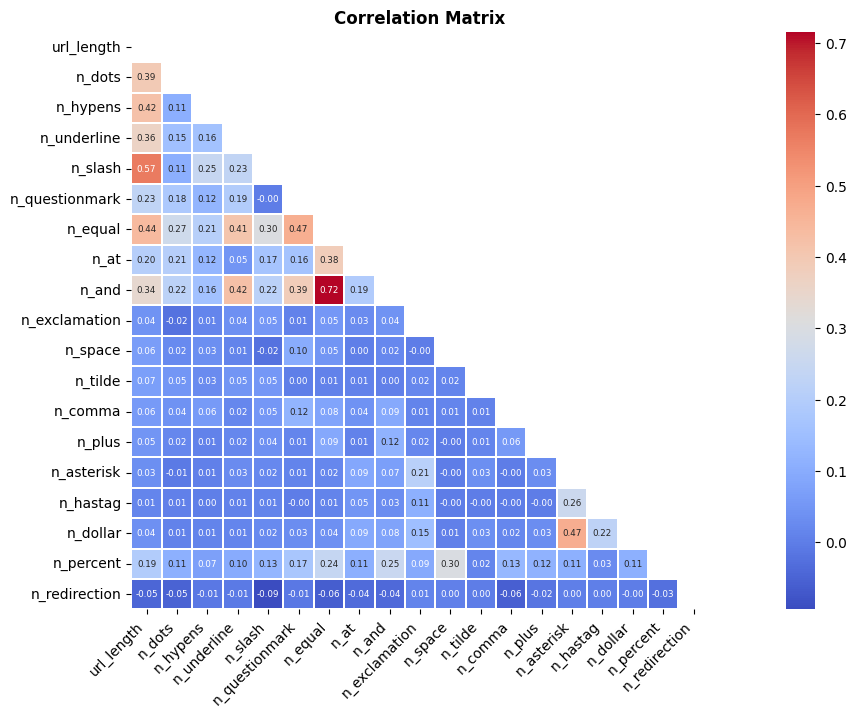

In [102]:
corr_matrix = dataset[dataset.columns[:-1]].corr(method = 'spearman')
mask = np.triu(np.ones_like(corr_matrix, dtype = bool))

fig,ax = plt.subplots(figsize = (20,7.5))
sns.heatmap(corr_matrix,
            cmap = 'coolwarm',
            annot = True,
            annot_kws = dict(fontsize = 6.3),
            fmt = '.2f',
            linewidths = 1.1,
            square = True,
            mask = mask,
            ax = ax)

ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right')
ax.set_title("Correlation Matrix", fontsize = 12, fontweight = 'bold', color = 'black')
fig.show()

In [103]:
dataset.drop_duplicates(inplace=True)
print("After removing duplicates :",dataset.duplicated().sum())

After removing duplicates : 0


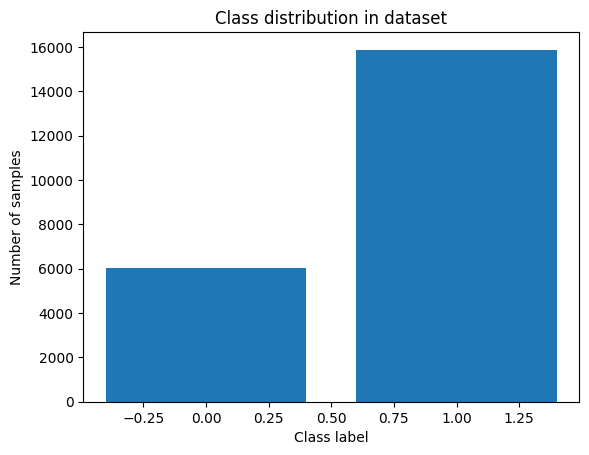


-----------------

0 : 6019
1 : 15872

-----------------



In [104]:
y = dataset.iloc[:,-1]
unique_labels, counts = np.unique(y, return_counts=True)

plt.bar(unique_labels, counts)
plt.xlabel('Class label')
plt.ylabel('Number of samples')
plt.title('Class distribution in dataset')
plt.show()\

print("\n-----------------\n")
print("0 :",(dataset['phishing']==0).sum())
print("1 :",(dataset['phishing']==1).sum())
print("\n-----------------\n")

The visualization shows there is imbalance dataset, which can cause bias in model leading to poor prediction.
The majority class will suppress the minority class prediction.

To fix this, I am applying Upsampling.


---


**Upsampling** : Upsampling is a resampling method to balance the datset, basically performing multiple methods including Data Augmentation for minority class to match the majority class,

In [105]:
df_majority = dataset[dataset['phishing'] == 1]
df_minority = dataset[dataset['phishing'] == 0]

# Upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,     # Sample with replacement
                                 n_samples=len(df_majority),  # Match majority class
                                 random_state=42)  # For reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

# Display the class distribution after upsampling
print(df_upsampled['phishing'].value_counts())

0    15872
1    15872
Name: phishing, dtype: int64


In [106]:
df_upsampled.head()
print("\n-----------------\n")
print("Total number of classifications as 0:",(df_upsampled['phishing']==0).sum())
print("Total number of classifications as 1:",(df_upsampled['phishing']==1).sum())
print("\n-----------------\n")


-----------------

Total number of classifications as 0: 15872
Total number of classifications as 1: 15872

-----------------



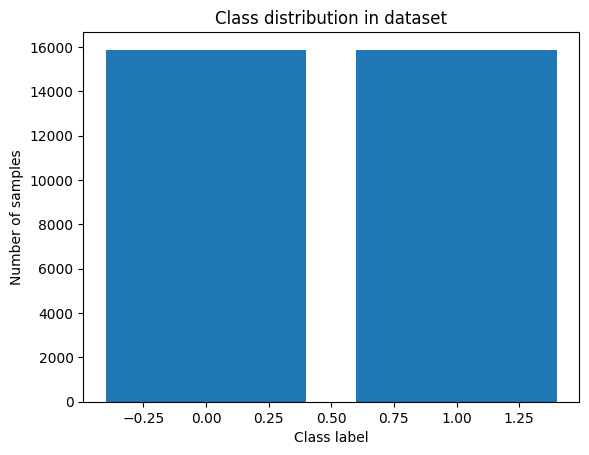

In [107]:
y = df_upsampled.iloc[:,-1]
unique_labels, counts = np.unique(y, return_counts=True)

plt.bar(unique_labels, counts)
plt.xlabel('Class label')
plt.ylabel('Number of samples')
plt.title('Class distribution in dataset')
plt.show()

## Determining Independent and Dependent variables
X -> independent variables (used to predict)
y -> dependent variables (to be predicted)

**Features [X]** : { url_length	n_dots	n_hypens	n_underline	n_slash	n_questionmark	n_equal	n_at	n_and	n_exclamation	n_space	n_tilde	n_comma	n_plus	n_asterisk	n_hastag	n_dollar	n_percent	n_redirection }

**To Predict** (y) : { phishing }
where, 0 -> No Phishing (Ligitimate)
       1 -> Phishing (Harmful)

Performing Train test split with **train** size = **70%** and **test** size = **30%**

In [108]:
X = df_upsampled.iloc[:,:-1]
y = df_upsampled.iloc[:,-1]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

Performing Standardization as a part of preprocessing, for a better fit for ML model.

In [109]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train.values)
X_test_scaled = sc.transform(X_test.values)
X_train_scaled

array([[-0.36094065,  0.13818768, -0.56706558, ..., -0.03506198,
        -0.12004718, -0.51459547],
       [ 0.20203407,  0.67046073, -0.56706558, ..., -0.03506198,
        -0.12004718,  0.48442234],
       [-0.07945329,  0.67046073, -0.56706558, ..., -0.03506198,
        -0.12004718, -0.51459547],
       ...,
       [-0.36094065, -0.39408537, -0.56706558, ..., -0.03506198,
        -0.12004718, -1.51361329],
       [-0.7016885 , -0.92635842, -0.56706558, ..., -0.03506198,
        -0.12004718,  0.48442234],
       [ 0.14277358,  0.13818768, -0.56706558, ..., -0.03506198,
        -0.12004718, -0.51459547]])

# Logistic Regression Model
### Performing GridSearchCV to find best paramters for Logistic Regression Model for classification
```
'C':[1,0.01,0.001,100],
    'penalty':['l1','l2','None'],
    'solver':['sag','lbfgs', 'liblinear'],  
```


          

In [ ]:
param_grid = {
    'C':[1,0.01,0.001,100],
    'penalty':['l1','l2','None'],
    'solver':['sag','lbfgs', 'liblinear'],
}

grid_search = GridSearchCV(LogisticRegression(max_iter=1200),param_grid,cv=5,scoring='accuracy')
grid_search.fit(X_train_scaled,y_train)


In [89]:
grid_search.best_params_

{'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}

In [90]:
lr = LogisticRegression(**grid_search.best_params_,random_state =42)
lr.fit(X_train_scaled,y_train)
lr

LogisticRegression(C=100, random_state=42)


-----------------

Train Accuracy : 75.42
Test Accuracy: 76.41

-----------------



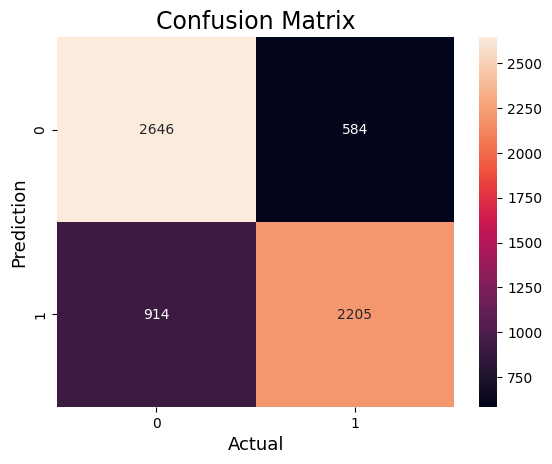

In [91]:
print("\n-----------------\n")
print("Train Accuracy :",format(accuracy_score(y_train,lr.predict(X_train_scaled))*100,".2f"))
print("Test Accuracy:",format(accuracy_score(y_test,lr.predict(X_test_scaled))*100,".2f"))
print("\n-----------------\n")
cm = confusion_matrix(y_test,lr.predict(X_test_scaled))
sns.heatmap(cm,
			annot=True,
			fmt='g',
			xticklabels=['0','1'],
			yticklabels=['0','1'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


# Decision Tree Classifier
#### using criterion = gini-impurity

In [92]:
dtc = DecisionTreeClassifier(criterion='gini')
dtc.fit(X_train_scaled,y_train)
dtc

DecisionTreeClassifier()


-----------------

Train Accuracy : 94.72
Test Accuracy: 85.87

-----------------



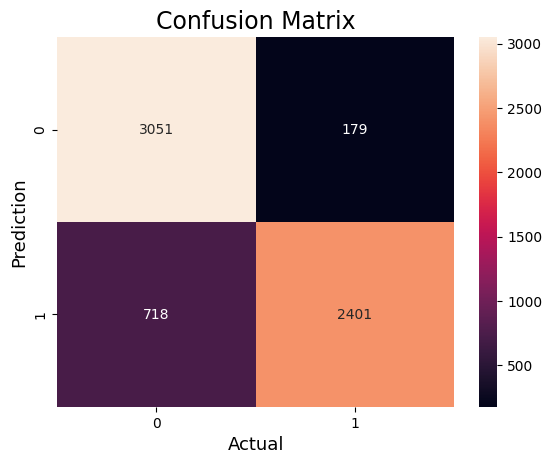

In [93]:
print("\n-----------------\n")
print("Train Accuracy :",format(accuracy_score(y_train,dtc.predict(X_train_scaled))*100,".2f"))
print("Test Accuracy:",format(accuracy_score(y_test,dtc.predict(X_test_scaled))*100,".2f"))
print("\n-----------------\n")
cm = confusion_matrix(y_test,dtc.predict(X_test_scaled))
sns.heatmap(cm,
			annot=True,
			fmt='g',
			xticklabels=['0','1'],
			yticklabels=['0','1'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


# Random Forest Classifier

In [94]:
rfc = RandomForestClassifier(n_estimators=200,random_state=42)
rfc.fit(X_train_scaled,y_train)

RandomForestClassifier(n_estimators=200, random_state=42)


-----------------

Train Accuracy : 94.72
Test Accuracy: 86.28

-----------------



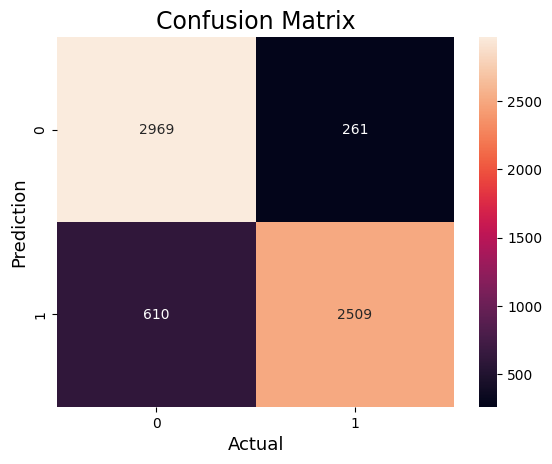

In [95]:
print("\n-----------------\n")
print("Train Accuracy :",format(accuracy_score(y_train,rfc.predict(X_train_scaled))*100,".2f"))
print("Test Accuracy:",format(accuracy_score(y_test,rfc.predict(X_test_scaled))*100,".2f"))
print("\n-----------------\n")
cm = confusion_matrix(y_test,rfc.predict(X_test_scaled))
sns.heatmap(cm,
			annot=True,
			fmt='g',
			xticklabels=['0','1'],
			yticklabels=['0','1'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

# Support Vector Machine
#### (Support Vector Classifier)

In [96]:
svm = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm.fit(X_train_scaled,y_train)
svm

SVC(random_state=42)


-----------------

Train Accuracy : 79.52
Test Accuracy: 79.86

-----------------



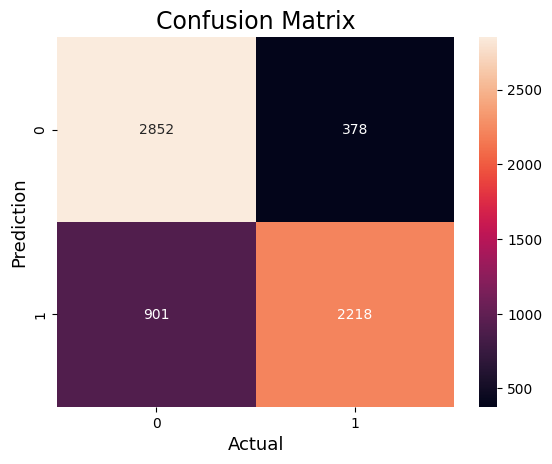

In [97]:
print("\n-----------------\n")
print("Train Accuracy :",format(accuracy_score(y_train,svm.predict(X_train_scaled))*100,".2f"))
print("Test Accuracy:",format(accuracy_score(y_test,svm.predict(X_test_scaled))*100,".2f"))
print("\n-----------------\n")
cm = confusion_matrix(y_test,svm.predict(X_test_scaled))
sns.heatmap(cm,
			annot=True,
			fmt='g',
			xticklabels=['0','1'],
			yticklabels=['0','1'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


# Classification Report


In [98]:
print("---------------------------------")
print("Logistic Regression on Test Data\n")
print(classification_report(y_test,lr.predict(X_test_scaled)))
print("---------------------------------")
print("Decision Tree Classifier on Test Data\n")
print(classification_report(y_test,dts.predict(X_test_scaled)))
print("---------------------------------")
print("Random Forest Classifier on Test Data\n")
print(classification_report(y_test,rfc.predict(X_test_scaled)))
print("---------------------------------")
print("Support Vector Machines on Test Data\n")
print(classification_report(y_test,svm.predict(X_test_scaled)))
print("---------------------------------")

---------------------------------
Logistic Regression on Test Data

              precision    recall  f1-score   support

           0       0.74      0.82      0.78      3230
           1       0.79      0.71      0.75      3119

    accuracy                           0.76      6349
   macro avg       0.77      0.76      0.76      6349
weighted avg       0.77      0.76      0.76      6349

---------------------------------
Decision Tree Classifier on Test Data

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      3230
           1       0.94      0.78      0.85      3119

    accuracy                           0.86      6349
   macro avg       0.88      0.86      0.86      6349
weighted avg       0.87      0.86      0.86      6349

---------------------------------
Random Forest Classifier on Test Data

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      3230
           1       0.91